### Importing Libraries

In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext lab_black

### Importing the data

In [2]:
train_data = pd.read_excel(
    "C:/Users/Todays Soutions/Documents/Data_Science/Projects/data/Data_Train.xlsx"
)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Count Value

In [7]:
def count_value(*, data):
    for col in df:
        print(f"{col}:\n {data[col].value_counts()}\n")
        print("=======================")

In [8]:
def count_value(*, data):
    for col in train_data:
        print(f"{col}:\n {data[col].value_counts()}\n")
        print("====================")

In [9]:
count = count_value(data=train_data)
count

Airline:
 Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Date_of_Journey:
 18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2

### Drop null values

In [10]:
train_data.dropna(inplace=True)

Checking the code after dropping the null values

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


The Date_of_Journey is a object data type,this datatype should be converted into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

Extracting the day of the month from "Date_of_Journey" column, to create a new column  called "Journey_day" containing the day of the month for each date in the "Date_of_Journey" column.

Breakdown
1. `pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y")`: This line converts the values in the "Date_of_Journey" column from string format to datetime format using the provided date format ("%d/%m/%Y"). This creates a Series of datetime objects.

2. `.dt.day`: This part of the code extracts the day component from the datetime objects in the Series created in the previous step. It returns a Series containing the day of the month for each datetime.

3. `train_data["Journey_day"] = ...`: Finally, this line assigns the Series containing the extracted day values to a new column called "Journey_day" in the "train_data" DataFrame.



In [12]:
train_data["Journey_day"] = pd.to_datetime(
    train_data.Date_of_Journey, format="%d/%m/%Y"
).dt.day

In [13]:
train_data["Journey_month"] = pd.to_datetime(
    train_data["Date_of_Journey"], format="%d/%m/%Y"
).dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
train_data["Journey_year"] = pd.to_datetime(
    train_data["Date_of_Journey"], format="%d/%m/%Y"
).dt.year

In [16]:
train_data["Journey_year"].value_counts()

2019    10682
Name: Journey_year, dtype: int64

In [17]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
# Also Dropping Journey_year beacuse it is just one value
train_data.drop(["Date_of_Journey"], axis=1, inplace=True)
train_data.drop(["Journey_year"], axis=1, inplace=True)

In [18]:
# Departure time is when a plane leaves the gate.
# Extracting values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Dropping Dep_Time
train_data.drop(["Dep_Time"], axis=1, inplace=True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
# Extracting values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# Extracting Minutes
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# dropping Arrival time
train_data.drop(["Arrival_Time"], axis=1, inplace=True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21


In [22]:
duration_list = train_data["Duration"]

# Lists to store processed hours and minutes data
duration_hours = []
duration_mins = []

for duration in duration_list:
    # Check if both "h" and "m" are present in the duration string
    if "h" in duration and "m" in duration:
        # Split the duration into hours and minutes parts
        hours, mins = duration.split()
        # Extract the numeric value of hours (remove "h" and convert to int)
        duration_hours.append(int(hours[:-1]))
        # Extract the numeric value of minutes (remove "m" and convert to int)
        duration_mins.append(int(mins[:-1]))
    # Check if only "h" is present in the duration string
    elif "h" in duration:
        # Extract the numeric value of hours (remove "h" and convert to int)
        duration_hours.append(int(duration[:-1]))
        # No minutes specified, so set to 0
        duration_mins.append(0)
    # Check if only "m" is present in the duration string
    elif "m" in duration:
        # No hours specified, so set to 0
        duration_hours.append(0)
        # Extract the numeric value of minutes (remove "m" and convert to int)
        duration_mins.append(int(duration[:-1]))

Explanation:

The code starts by assuming there's a dataset named train_data that includes a column named "Duration."

The duration_list variable is created by extracting the "Duration" column from the train_data dataset.

Two empty lists, duration_hours and duration_mins, are created to store the processed hours and minutes data, respectively.

The code then iterates through each entry in duration_list using a loop.

Inside the loop, the code first checks if both "h" (hours) and "m" (minutes) are present in the current duration string using the in keyword.

If both "h" and "m" are present, the code splits the duration string into hours and minutes parts. The numeric values are extracted by removing the trailing "h" and "m" characters and converting them to integers. These values are then appended to duration_hours and duration_mins lists, respectively.

If only "h" is present in the duration string, the code extracts the numeric value of hours, removes the "h" character, and appends it to duration_hours. Since no minutes are specified, the code appends 0 to duration_mins.

If only "m" is present in the duration string, the code appends 0 to duration_hours since no hours are specified. The numeric value of minutes is extracted by removing the "m" character and then converted to an integer before being appended to duration_mins.

After the loop completes, the duration_hours list contains the processed hour values, and the duration_mins list contains the processed minute values. These lists can be used for further analysis, calculations, or modeling.


In [23]:
# Adding duration_hours and duration_mins list to train_data dataframe
train_data["Duration_hours"] = duration_hours
train_data["duration_mins"] = duration_mins

In [24]:
train_data.drop(["Duration"], axis=1, inplace=True)

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,4,45


### Handling Categorical Data
#### One can find many ways to handle categorical data. Some of them categorical data are,

####  Nominal data --> data are not in any order --> OneHotEncoder is used in this case
#### Ordinal data --> data are in order --> LabelEncoder is used in this case

In [26]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

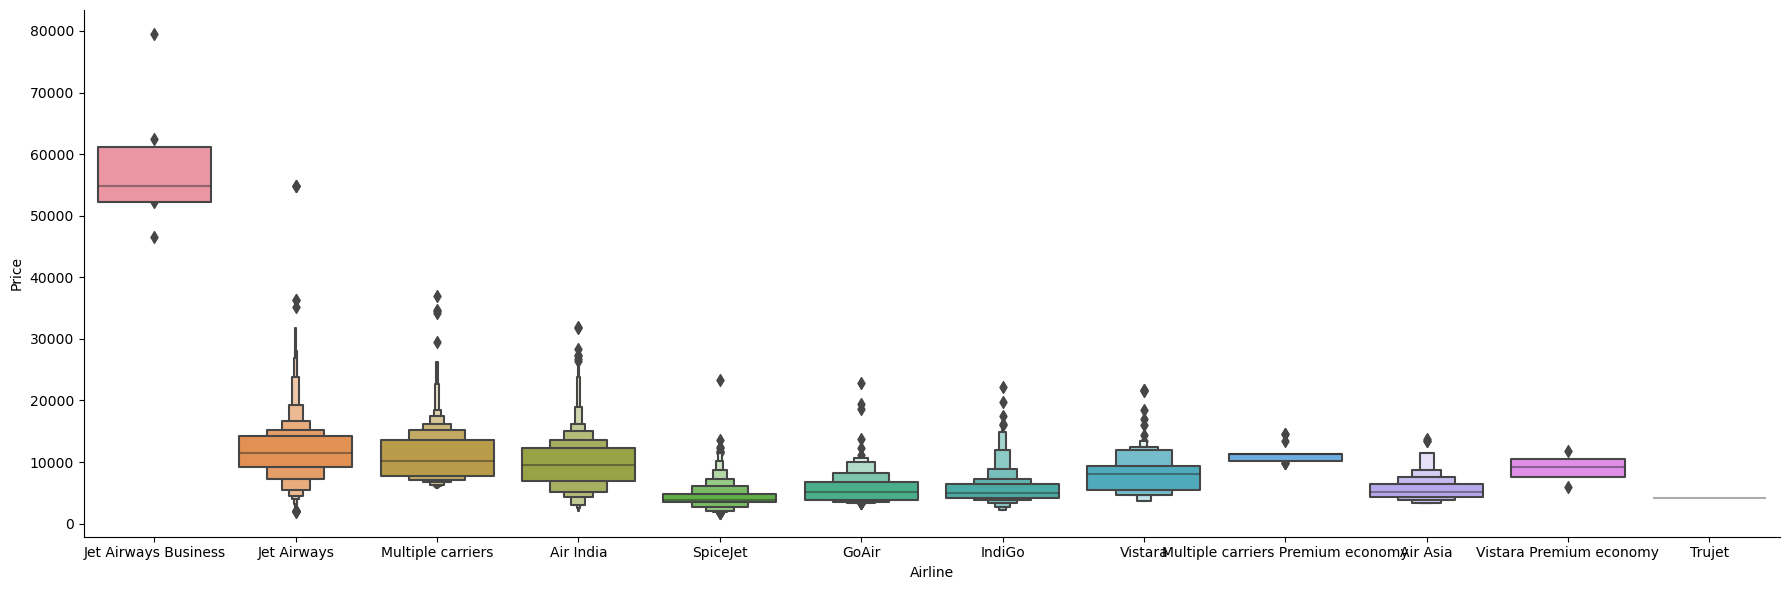

In [27]:
# Airline vs Price
sns.catplot(
    y="Price",
    x="Airline",
    data=train_data.sort_values("Price", ascending=False),
    kind="boxen",
    height=6,
    aspect=3,
)
plt.show()

In [28]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Certainly, this code performs one-hot encoding on the "Airline" column of a DataFrame named `train_data`. Let's break down each step:

1. **Selecting the "Airline" Column:**
   - `Airline = train_data[["Airline"]]`: This line creates a new DataFrame named `Airline` by extracting the "Airline" column from the `train_data` DataFrame. The double square brackets `["Airline"]` are used to specify that the "Airline" column should be selected and retained as its own DataFrame, preserving its original structure.

2. **Performing One-Hot Encoding:**
   - `pd.get_dummies(Airline, drop_first=True)`: This line uses the `pd.get_dummies()` function from the pandas library to perform one-hot encoding on the `Airline` DataFrame.
   - `pd.get_dummies()` is a function that converts categorical variables into a set of binary columns (0s and 1s), effectively creating indicator variables for each category.
   - The `drop_first=True` argument indicates that one category column should be dropped to avoid multicollinearity. This means that out of all the categories for the "Airline" column, the first one is omitted, and only the rest are encoded.

3. **Result and Output:**
   - The result of `pd.get_dummies()` is a new DataFrame where each category in the original "Airline" column is represented as a binary column. Each row in this new DataFrame corresponds to a row in the original DataFrame, and the value in each binary column indicates whether the corresponding airline was present in that row.
   - The `.head()` method is used to display the first few rows of the resulting DataFrame, which shows the one-hot encoded representation of the "Airline" data.

In summary, this code takes the "Airline" column from the `train_data` DataFrame, performs one-hot encoding on it, and displays the one-hot encoded representation of the data in a new DataFrame. This encoding is useful for machine learning algorithms that require numerical input, as it transforms categorical data into a format that can be used for analysis and modeling.

In [29]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

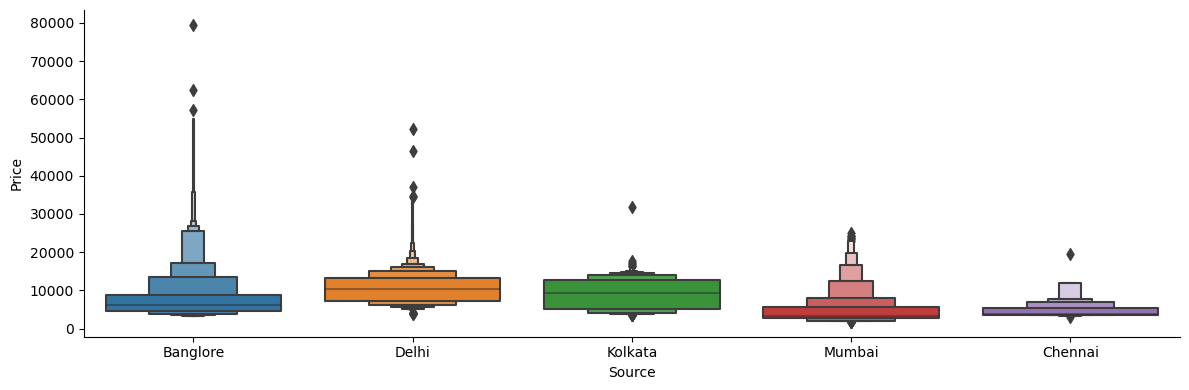

In [30]:
# source vs price
sns.catplot(
    y="Price",
    x="Source",
    data=train_data.sort_values("Price", ascending=False),
    kind="boxen",
    height=4,
    aspect=3,
)
plt.show()

In [31]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [32]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [35]:
train_data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [36]:
# Additional_info contains almost 80% no_info
# Rout and Total_Stops are related to each othe

train_data.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [37]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
# This is an Ordinal Categorical type I will perform LabelEncoder
# Here Values are assigned with corresponding keys
train_data.replace(
    {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True
)

In [39]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,4,45


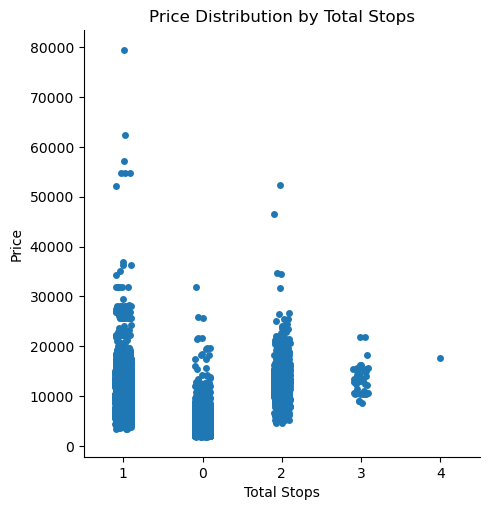

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxen plot to compare the distribution of prices for each category of Total_Stops
sns.catplot(
    x="Total_Stops",  # X-axis represents "Total_Stops"
    y="Price",  # Y-axis represents "Price"
    data=train_data,  # Use the original train_data DataFrame
    order=train_data["Total_Stops"]
    .value_counts()
    .index,  # Order categories by frequency
)

# Adding labels and title
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.title("Price Distribution by Total Stops")

# Display the plot
plt.show()

In [42]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [43]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
data_train.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [45]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
data_train.shape

(10682, 29)

In [47]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_day                                10682 non-null  int64
 3   Journey_month                              10682 non-null  int64
 4   Dep_hour                                   10682 non-null  int64
 5   Dep_min                                    10682 non-null  int64
 6   Arrival_hour                               10682 non-null  int64
 7   Duration_hours                             10682 non-null  int64
 8   duration_mins                              10682 non-null  int64
 9   Airline_Air India                          10682 non-null  uint8
 10  Airline_GoAir                              106

### Test Set

In [48]:
test_data = pd.read_excel(
    "C:/Users/Todays Soutions/Documents/Data_Science/Projects/data/Test_set.xlsx"
)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Preprocessing the the Test data

In [49]:
# Preprocessing

print("Test data Info")
print("-" * 75)
print(test_data.info())

print()
print()

print("Null values :")
print("-" * 75)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(
    test_data.Date_of_Journey, format="%d/%m/%Y"
).dt.day
test_data["Journey_month"] = pd.to_datetime(
    test_data["Date_of_Journey"], format="%d/%m/%Y"
).dt.month
test_data.drop(["Date_of_Journey"], axis=1, inplace=True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis=1, inplace=True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis=1, inplace=True)

# Duration
duration_list = test_data["Duration"]

# Lists to store processed hours and minutes data
duration_hours = []
duration_mins = []

for duration in duration_list:
    # Check if both "h" and "m" are present in the duration string
    if "h" in duration and "m" in duration:
        # Split the duration into hours and minutes parts
        hours, mins = duration.split()
        # Extract the numeric value of hours (remove "h" and convert to int)
        duration_hours.append(int(hours[:-1]))
        # Extract the numeric value of minutes (remove "m" and convert to int)
        duration_mins.append(int(mins[:-1]))
    # Check if only "h" is present in the duration string
    elif "h" in duration:
        # Extract the numeric value of hours (remove "h" and convert to int)
        duration_hours.append(int(duration[:-1]))
        # No minutes specified, so set to 0
        duration_mins.append(0)
    # Check if only "m" is present in the duration string
    elif "m" in duration:
        # No hours specified, so set to 0
        duration_hours.append(0)
        # Extract the numeric value of minutes (remove "m" and convert to int)
        duration_mins.append(int(duration[:-1]))

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis=1, inplace=True)


# Categorical data

print("Airline")
print("-" * 75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first=True)

print()

print("Source")
print("-" * 75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first=True)

print()

print("Destination")
print("-" * 75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first=True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis=1, inplace=True)

# Replacing Total_Stops
test_data.replace(
    {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True
)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis=1)

data_test.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [50]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Feature Selection

#### Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,1. heatmap 

2. feature_importance_

3. SelectKBestBest

In [51]:
data_train.shape

(10682, 29)

In [52]:
### Init the constant

In [53]:
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "Price"

In [54]:
X = data_train.drop(columns=TARGET)

In [55]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
y = data_train[TARGET]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

C:\Users\Todays Soutions\AppData\Local\Temp\ipykernel_22576\1380922547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")


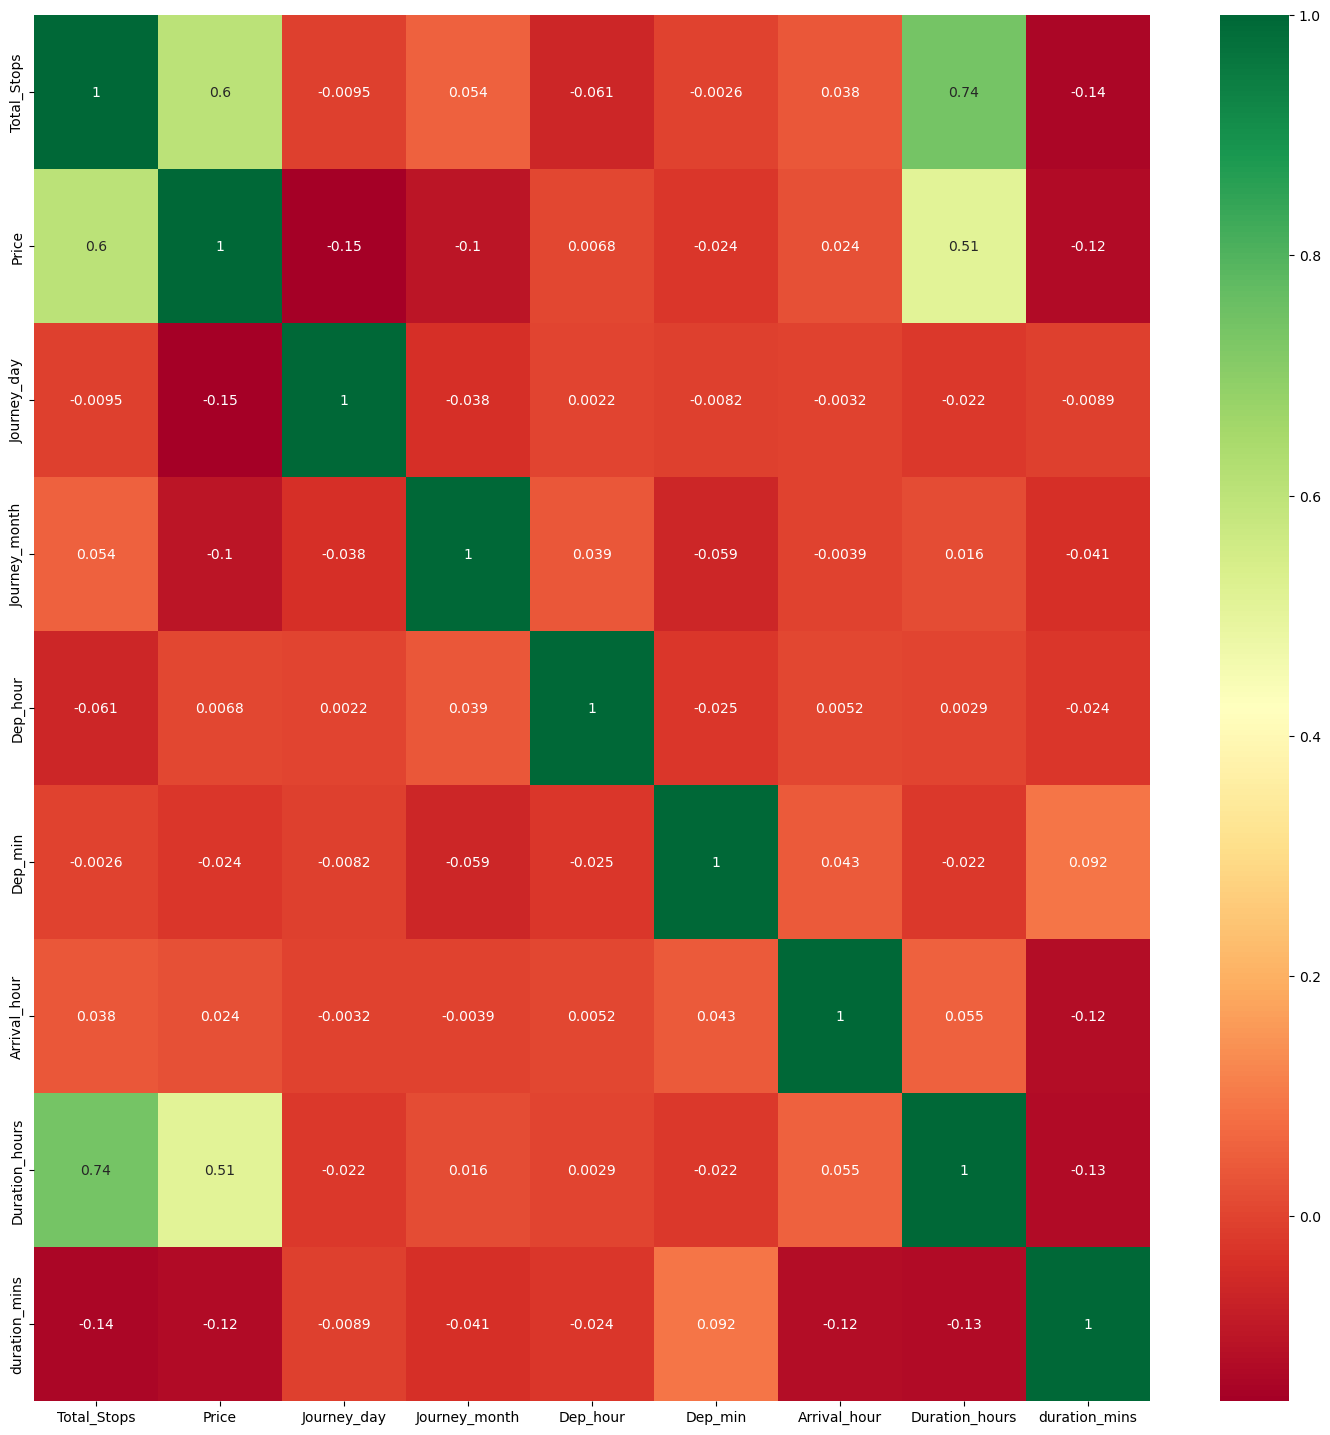

In [57]:
plt.figure(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [58]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

Certainly, this code is using the Extra Trees Regressor from the `sklearn.ensemble` module to determine the importance of features in a regression problem. Let's break down each part:

1. **Importing Required Libraries:**
   - `from sklearn.ensemble import ExtraTreesRegressor`: This line imports the Extra Trees Regressor class from the `sklearn.ensemble` module, which is part of the scikit-learn library.

2. **Initializing the Extra Trees Regressor:**
   - `selection = ExtraTreesRegressor()`: This line creates an instance of the Extra Trees Regressor and assigns it to the variable `selection`.

3. **Fitting the Model:**
   - `selection.fit(X, y)`: Here, `X` represents the feature matrix (input variables), and `y` represents the target variable (output or dependent variable) of the regression problem. The `fit()` method is called on the `selection` object to train the Extra Trees Regressor model using the provided features and target.

The Extra Trees Regressor is an ensemble learning method based on decision trees. It works by constructing a forest of decision trees during the training process and then averaging the predictions of individual trees to make the final prediction. In this specific case, it's used to estimate the importance of different features in predicting the target variable (`y`).

After fitting the model, you can access the feature importances using the `feature_importances_` attribute of the `selection` object. This attribute will provide you with an array of values indicating the relative importance of each feature in the prediction task. These values can be used to understand which features are contributing the most to the prediction and which ones might be less influential.


In [59]:
print(selection.feature_importances_)

[2.23877238e-01 1.43939401e-01 5.52559931e-02 2.67181911e-02
 2.47117047e-02 3.26465154e-02 1.33540453e-01 2.19766177e-02
 9.39712339e-03 1.96538977e-03 2.21523871e-02 1.32239612e-01
 6.71146192e-02 1.69164894e-02 8.49605936e-04 3.40482044e-03
 1.15785566e-04 4.70234479e-03 7.68946137e-05 5.24934614e-04
 1.11467563e-02 3.34050159e-03 6.89662564e-03 1.12667460e-02
 1.37156904e-02 6.13956123e-03 5.25618726e-04 2.48423800e-02]


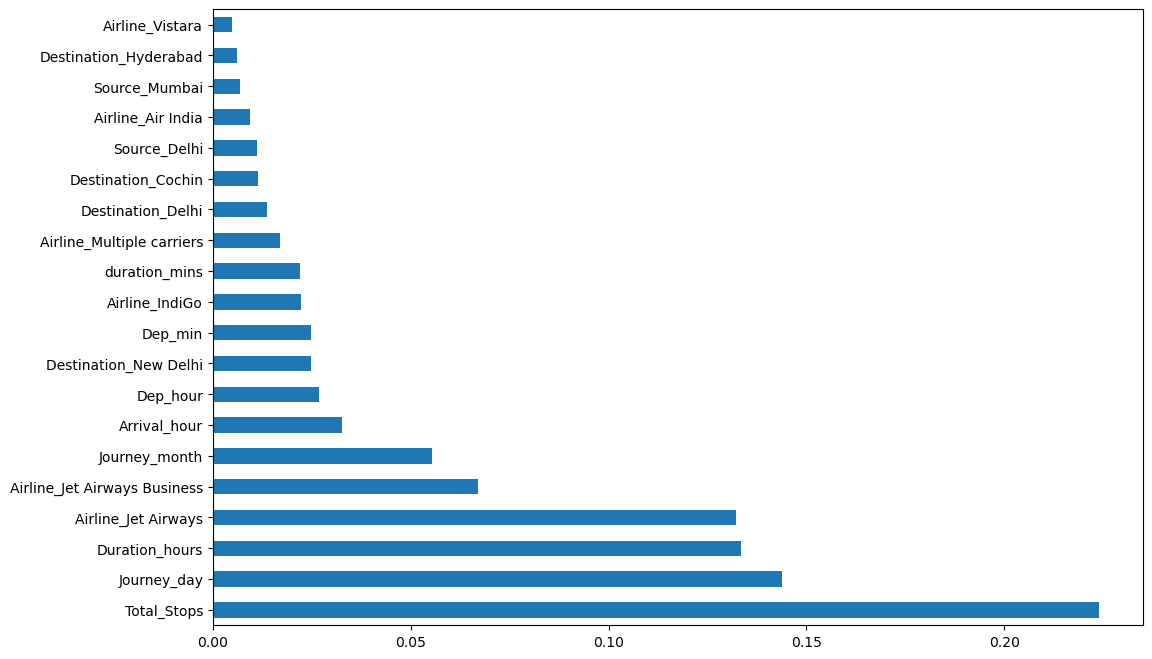

In [60]:
# plot graph of feature importances for better visualization
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

### Fitting model using Random Forest
1. Split dataset into train and test set in order to prediction w.r.t X_test

2. If needed do scaling of data

    - Scaling is not done in Random forest

3. Import model

4. Fit the data

5. Predict w.r.t X_test

6. In regression check RSME Score
7. Plot graph

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [62]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
y_pred = reg_rf.predict(X_test)

In [64]:
reg_rf.score(X_train, y_train)

0.9533835792603638

In [65]:
reg_rf.score(X_test, y_test)

0.7971000759347683

C:\Users\Todays Soutions\AppData\Local\Temp\ipykernel_22576\523175245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


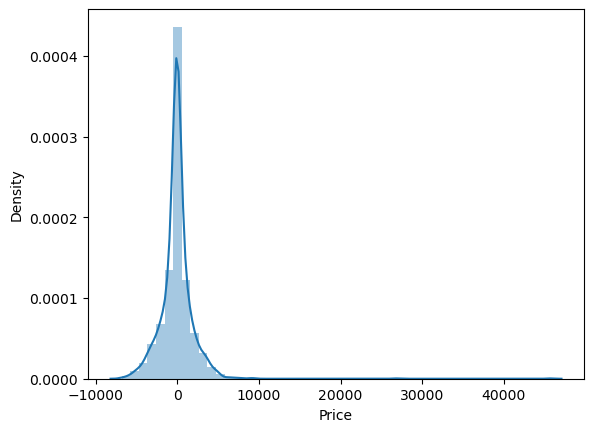

In [66]:
sns.distplot(y_test - y_pred)
plt.show()

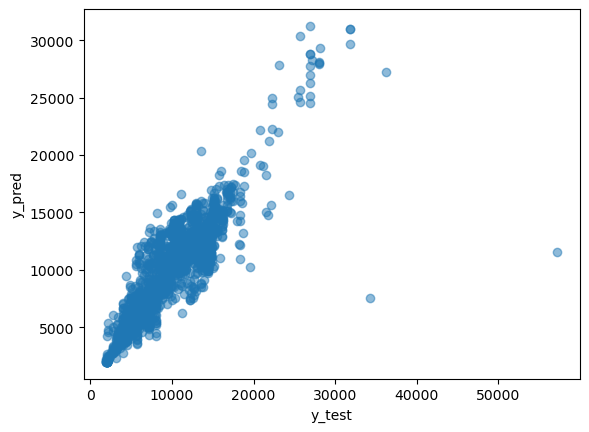

In [67]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [68]:
from sklearn import metrics

In [69]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1181.441670886359
MSE: 4374939.590862675
RMSE: 2091.6356257395014


In [70]:
# RMSE/(max(DV)-min(DV))

2090.5509 / (max(y) - min(y))

0.026887077025966846

In [71]:
metrics.r2_score(y_test, y_pred)

0.7971000759347683

### Hyperparameter Tuning

Choose following method for hyperparameter tuning

RandomizedSearchCV --> Fast

GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to conside at every split
max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

This code snippet sets up parameter grids for performing hyperparameter tuning using Randomized Search Cross-Validation (RandomizedSearchCV). It defines ranges of hyperparameter values that will be explored during the hyperparameter search process. Let's go through each parameter definition:

1. **Number of Trees (n_estimators):**
   - `n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]`: This line defines a list of potential values for the number of trees in a random forest ensemble.
   - `np.linspace(start = 100, stop = 1200, num = 12)` generates 12 evenly spaced values between 100 and 1200, covering a range of potential tree numbers.

2. **Number of Features to Consider at Every Split (max_features):**
   - `max_features = ['auto', 'sqrt']`: This line creates a list containing two options for the `max_features` hyperparameter, which determines the number of features to consider at each split in a decision tree.
   - `'auto'` means that all features are considered.
   - `'sqrt'` means the square root of the number of features is considered.

3. **Maximum Number of Levels in Tree (max_depth):**
   - `max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]`: This line defines a list of potential values for the maximum depth of a decision tree.
   - `np.linspace(5, 30, num = 6)` generates 6 evenly spaced values between 5 and 30, covering a range of potential maximum depths.

4. **Minimum Number of Samples Required to Split a Node (min_samples_split):**
   - `min_samples_split = [2, 5, 10, 15, 100]`: This line creates a list of options for the `min_samples_split` hyperparameter, which determines the minimum number of samples required to split an internal node.
   - For instance, if `min_samples_split = 5`, a node won't be split if it contains fewer than 5 samples.

5. **Minimum Number of Samples Required at Each Leaf Node (min_samples_leaf):**
   - `min_samples_leaf = [1, 2, 5, 10]`: This line defines a list of options for the `min_samples_leaf` hyperparameter, which determines the minimum number of samples required at a leaf node (the end node of a tree).
   - For example, with `min_samples_leaf = 2`, each leaf node must have at least 2 samples.

This code is essentially creating a set of possible hyperparameter values to search over using RandomizedSearchCV. By providing a range of values for each hyperparameter, the Randomized Search will explore different combinations of these values to find the optimal configuration that results in the best model performance. This process helps in finding the hyperparameters that produce the best model without exhaustively trying all possible combinations.

In [74]:
# Create the random grid
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
}

This code is creating a "random grid" for hyperparameter tuning using a Randomized Search. The random grid is a dictionary containing different values for each hyperparameter that you want to search over. Let's go through the code step by step:

```python
# Create the random grid
random_grid = {
    "n_estimators": n_estimators,
    "max_feature": max_feature,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
}
```

- `random_grid` is a dictionary that will hold different combinations of hyperparameter values for the Randomized Search.

- `"n_estimators": n_estimators`:
  - This line assigns the `n_estimators` list (defined earlier) to the "n_estimators" key in the dictionary.
  - `n_estimators` contains a list of potential values for the number of trees in the ensemble.

- `"max_feature": max_feature`:
  
  - This line assigns the `max_features` list (defined earlier) to the "max_features" key in the dictionary.
  - `max_features` contains two options for the number of features to consider at each split in a decision tree.

- `"max_depth": max_depth`:
  - This line assigns the `max_depth` list (defined earlier) to the "max_depth" key in the dictionary.
  - `max_depth` contains a list of potential values for the maximum depth of a decision tree.

- `"min_samples_split": min_samples_split`:
  - This line assigns the `min_samples_split` list (defined earlier) to the "min_samples_split" key in the dictionary.
  - `min_samples_split` contains a list of potential values for the minimum number of samples required to split a node.

- `"min_samples_leaf": min_samples_leaf`:
  - This line assigns the `min_samples_leaf` list (defined earlier) to the "min_samples_leaf" key in the dictionary.
  - `min_samples_leaf` contains a list of potential values for the minimum number of samples required at a leaf node.

Once the `random_grid` dictionary is created, it holds various combinations of hyperparameter values. This dictionary will be used as input for the Randomized Search Cross-Validation process, where the Randomized Search algorithm will sample different combinations of hyperparameters from this grid and evaluate their performance to find the optimal hyperparameters for the model.

In [75]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(
    estimator=reg_rf,
    param_distributions=random_grid,
    scoring="neg_mean_squared_error",
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1,
)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   8.4s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.6s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.7s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.8s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.7s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.2s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.0s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.3s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.1s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.3s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  11.1s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  11.2s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  11.7s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  12.0s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  12.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  17.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  17.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  17.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.7s
[CV] END max_depth=5, max_feat

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  17.9s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.0s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  17.2s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  17.9s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  16.9s


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### Importing necessary library
from sklearn.model_selection import RandomizedSearchCV

### Creating a RandomizedSearchCV instance
rf_random = RandomizedSearchCV(
    estimator=reg_rf,                     # The base RandomForestRegressor model
    
    param_distributions=random_grid,       # The random grid of hyperparameters to search
    
    scoring='neg_mean_squared_error',      # The metric to optimize (negative mean squared error)
    
    n_iter=10,                             # Number of parameter settings that are sampled
    
    cv=5,                                  # Number of cross-validation folds
    
    verbose=2,                             # Verbosity level during the search process
    
    random_state=42,                       # Random seed for reproducibility
    
    n_jobs=1                               # Number of parallel jobs (-1 for all CPUs)
)

### Fitting the RandomizedSearchCV instance to the training data
rf_random.fit(X_train, y_train)


In [76]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [77]:
prediction = rf_random.predict(X_test)

C:\Users\Todays Soutions\AppData\Local\Temp\ipykernel_22576\565025536.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - prediction)


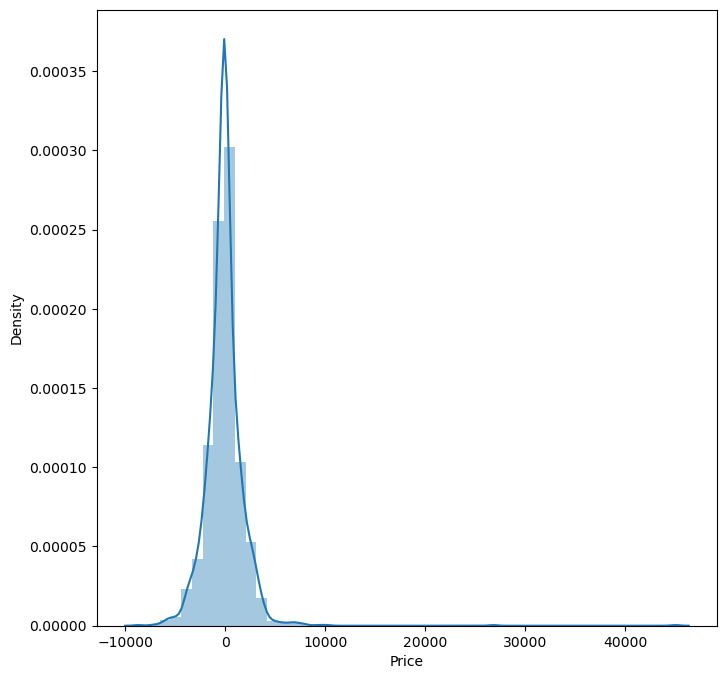

In [78]:
plt.figure(figsize=(8, 8))
sns.distplot(y_test - prediction)
plt.show()

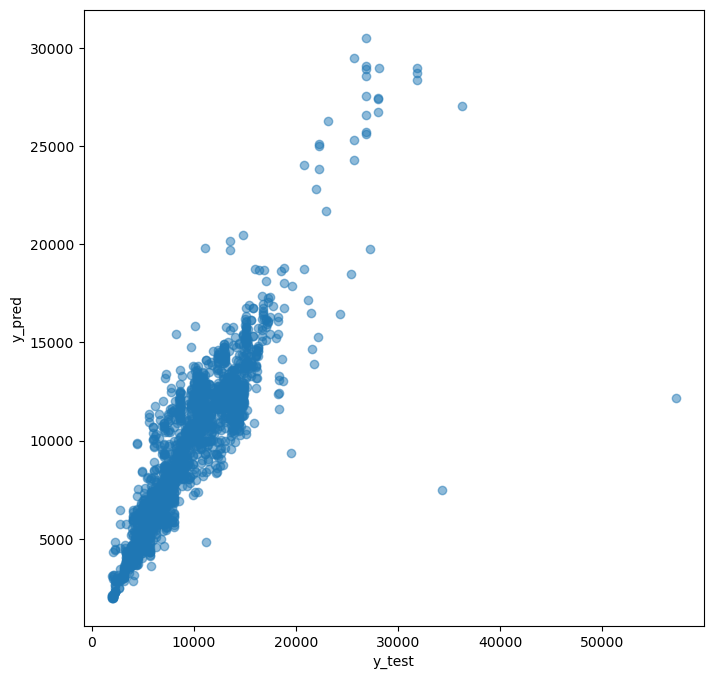

In [79]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [80]:
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE:", metrics.mean_squared_error(y_test, prediction))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1171.7138716300005
MSE: 4062713.831863529
RMSE: 2015.6174815335198


### Save the model to reuse it again

In [81]:
import pickle

# open a file, where you ant to store the data
file = open(
    "C:/Users/Todays Soutions/Documents/Data_Science/Projects/Flight_price/flight_rf.pkl",
    "wb",
)

# dump information to that file
pickle.dump(rf_random, file)

In [84]:
model = open(
    "C:/Users/Todays Soutions/Documents/Data_Science/Projects/Flight_price/flight_rf.pkl",
    "rb",
)
forest = pickle.load(model)

In [87]:
y_prediction = forest.predict(X_test)
y_prediction

array([17379.10097797,  5718.74062982,  8654.33844483, ...,
        6880.34660513, 12398.59890232, 12556.61350934])

In [88]:
metrics.r2_score(y_test, y_prediction)

0.8115804090859843